# Bike Sharing Assignment

In this notebook, I will do the following:
- Data Preparation
- Exploratory Data Analysis (Univariate)
- Exploratory Data Analysis (Bivariate)
- Model Building
- Inferences

## Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [932]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [934]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [936]:
# Read the given CSV file, and view some sample records

day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [938]:
day.shape

(730, 16)

In [940]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [942]:
100*day.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [944]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [946]:
#Checking for duplicates
len(day[day.duplicated()])

0

Findings 1.1

The Dataset has 730 rows and 16 columns

"dteday" is a date field, but it is an integer/float

No null values in any row or column.

No duplicate data

## Data Cleaning and Preparation

### Feature understanding

Instant: record index, serial number and it can be dropped as it is redundant and may not provide real value or insights.

dteday: This field has been segregated into day, month, year into separate columns. This column is redundant and can be dropped.

season: Categorical seasons, which should be converted from numerical codes to category names. Dummies to be created based on this.

yr: Year as 2018 or 2019

mnth: month from 1 to 12 (Categorical); to be converted to month names.

holiday: Indicates whether a holiday or not, a boolean flag. 

weekday: day of the week, convert to Sunday to Saturday so that dummies can be created.

weathersit: Numerically encoded categorical variables. Should be converted to names and to be converted to dummies.

temp: temperature in Celsius, no change

atemp: perceived temperature, no change

hum: humidity, no change

windspeed: no change

casual: not our concern as it is a component of cnt. Should be dropped.

registered: Count of registered, should be dropped as component of cnt.

cnt: dependent variable, Target variable for prediction.


## Dropping all fields with no value addition (reason mentioned above)

In [952]:
#Drop the instant and dteday columns from the dataset (reasoning in the above)

day= day.drop("instant",axis=1)
day= day.drop("dteday",axis=1)
day= day.drop("casual",axis=1)
day= day.drop("registered",axis=1)


day.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801


In [954]:
#Check the shape after dropping
day.shape

(730, 12)

In [956]:
#Transforming weekday, weather situation, season and month features respectively:
day['weekday']=day['weekday'].map({0: 'Sunday', 1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
day['weathersit']=day['weathersit'].map({1: 'Clear or Partly Cloudy', 2:'Misty and Cloudy', 3:'Light Rain or Snow',4:'Heavy Rain or Snow',})
day['season']=day['season'].map({1: 'Spring', 2:'Summer', 3:'Fall',4:'Winter',})
day['mnth']=day['mnth'].map({1: 'Jan', 2:'Feb', 3:'Mar',4:'Apr',5: 'May', 6:'Jun', 7:'Jul',8:'Aug',9: 'Sep', 10:'Oct', 11:'Nov',12:'Dec'})
day.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801


## Exploratory Data Analysis (Univariate)

In [959]:
# Seggregating columns as categorical, and numerical
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"] 
num_cols=["temp","dteday","atemp","hum","windspeed","casual","registered","cnt"] 
extra_cols=["instant"]

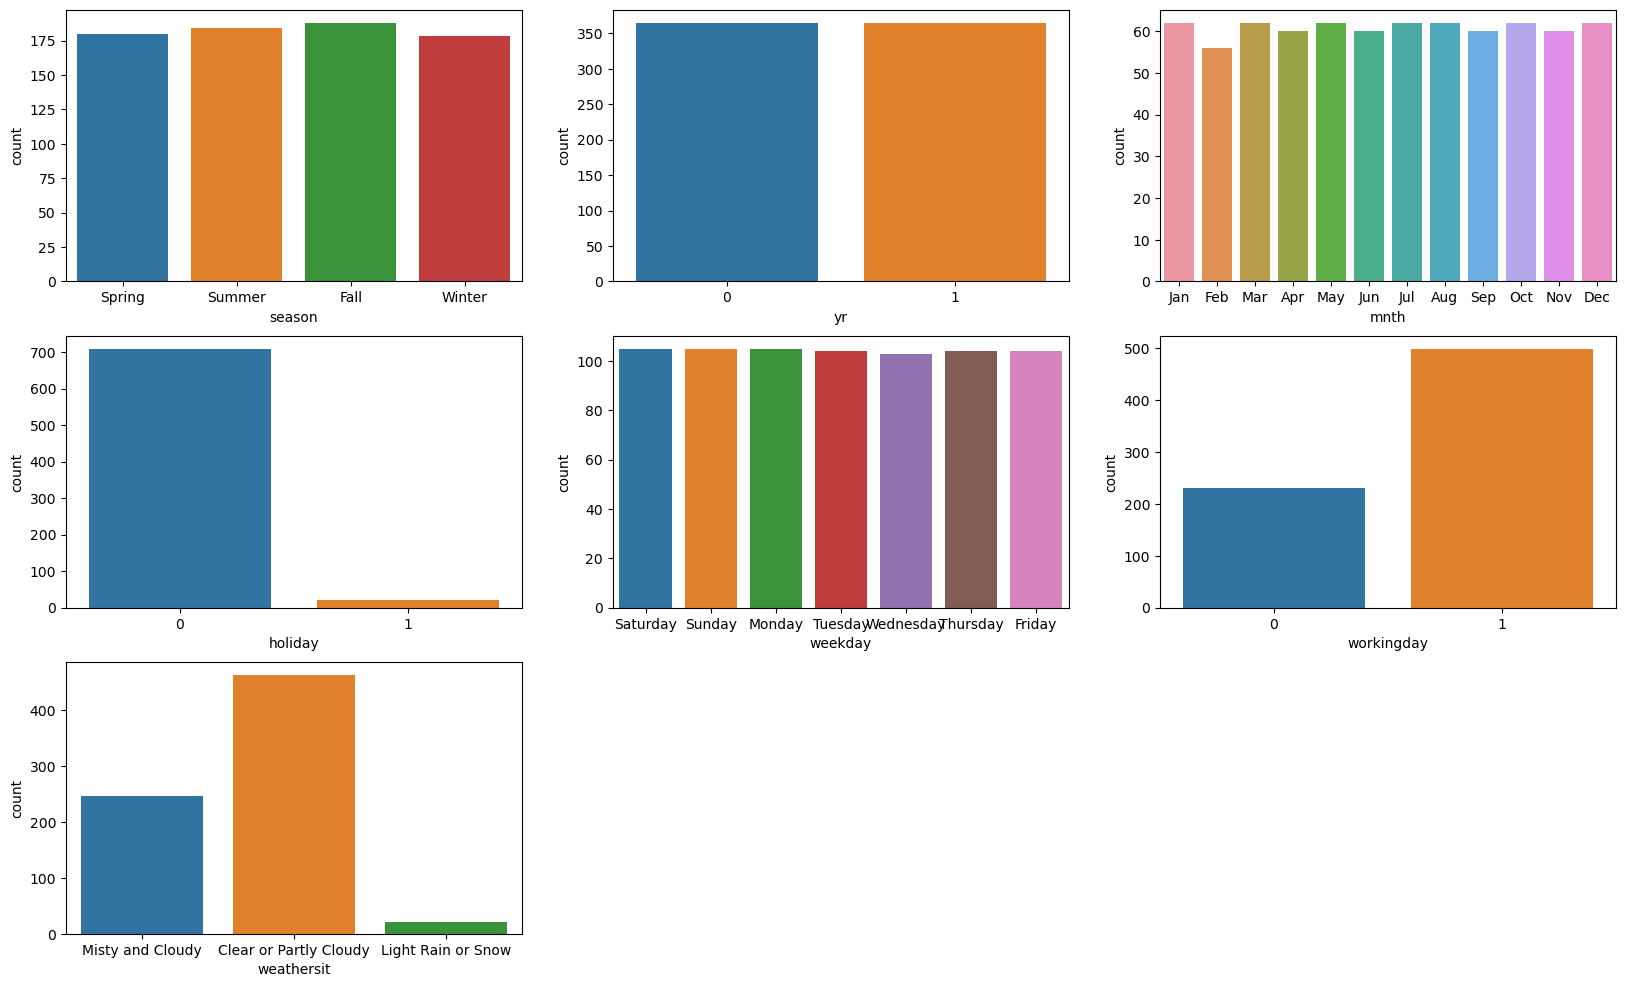

In [965]:
# Getting the histogram plot for all the categorical variable. Counts of each category
plt.figure(figsize=(20, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=day[col])

plt.show()

## Observations from Univariate categorical fields

- The dataset has almost the same number of days for each season.
- Most days are working day
- Most days in the dataset is clear or partly clouded.

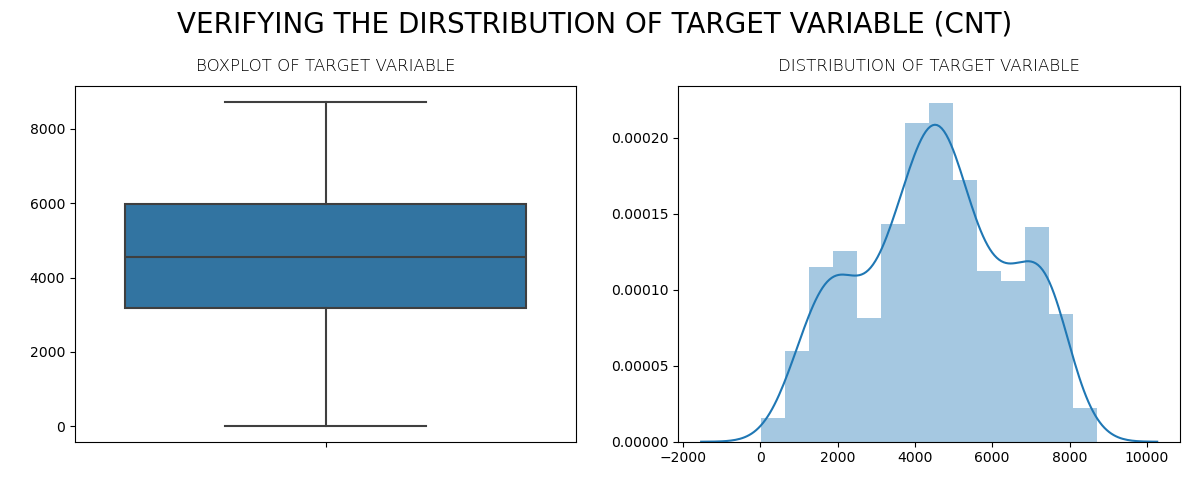

In [967]:
#Understand the distribution of Target Variable cnt

#Subplot grid with to accommodate two plots
fig, ax=plt.subplots(nrows = 1,ncols=2,figsize=(12,5))

fig.suptitle("Verifying the dirstribution of target variable (cnt)".upper(), fontsize=20)

#Plot 1
sns.boxplot(y=day['cnt'],ax=ax[0])
ax[0].set_title('boxplot of target variable'.upper(),fontsize=12,fontweight=20,y=1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#Plot 2
sns.distplot(day['cnt'],ax=ax[1])
ax[1].set_title('distribution of target variable'.upper(),fontsize=12,fontweight=20,y=1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')


#Setting aesthetics
plt.tight_layout()
plt.show()

## Observations from Univariate analysis of Target Variable

Q1 of target variable is around 3000 and Q3 at around 60 with a median of 4500
The variable is almost normal distribution

## Exploratory Data Analysis (BiVariate)

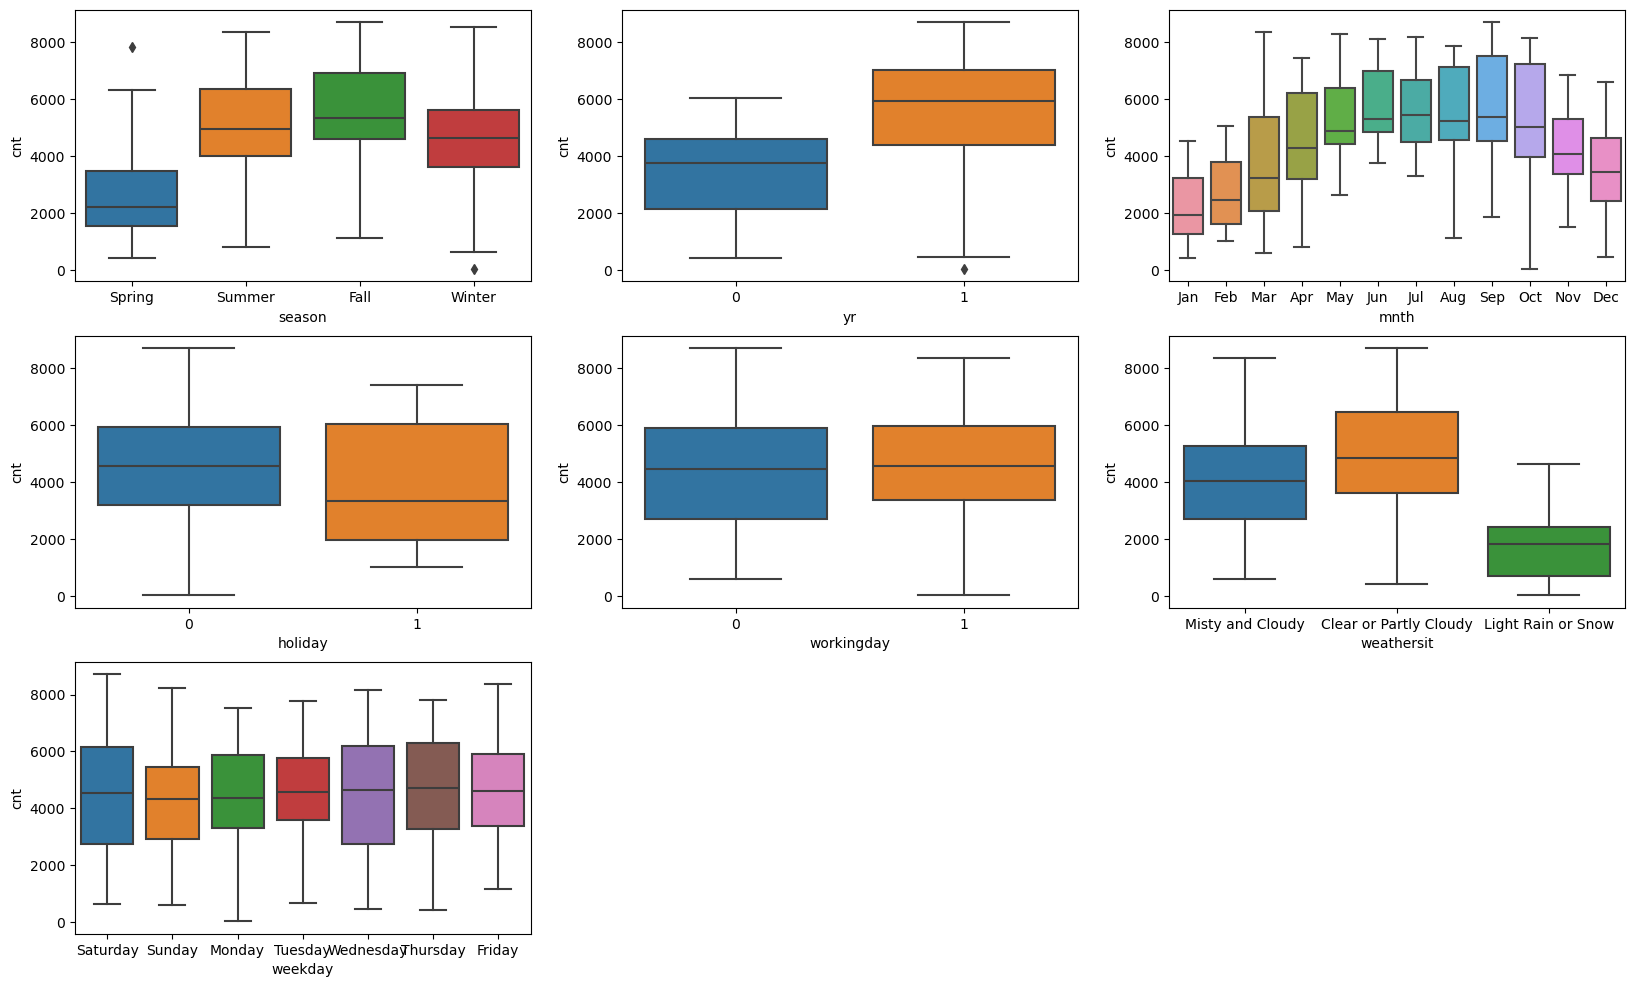

In [618]:
#Plots with Categorical vs Target Variable

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)

plt.show()

### Observations of Categorical Plots against the target variable

- The maximum demand is in fall, followed by summer and winter
- 2019 has had a increase in business (median 6000) compared to that of 2018 (median 4000).
- The pattern of month on month demand almost forms a bell curve/normal distribution which again signifies that highest demand occurs in fall and summer. (May to October Highest demand)
- Demand is highest on clear days and lowest on rainy/snowy days and almost no demand during heavy snow.
- holidays have slightly lower demand than that of weekday.


<Axes: xlabel='windspeed', ylabel='cnt'>

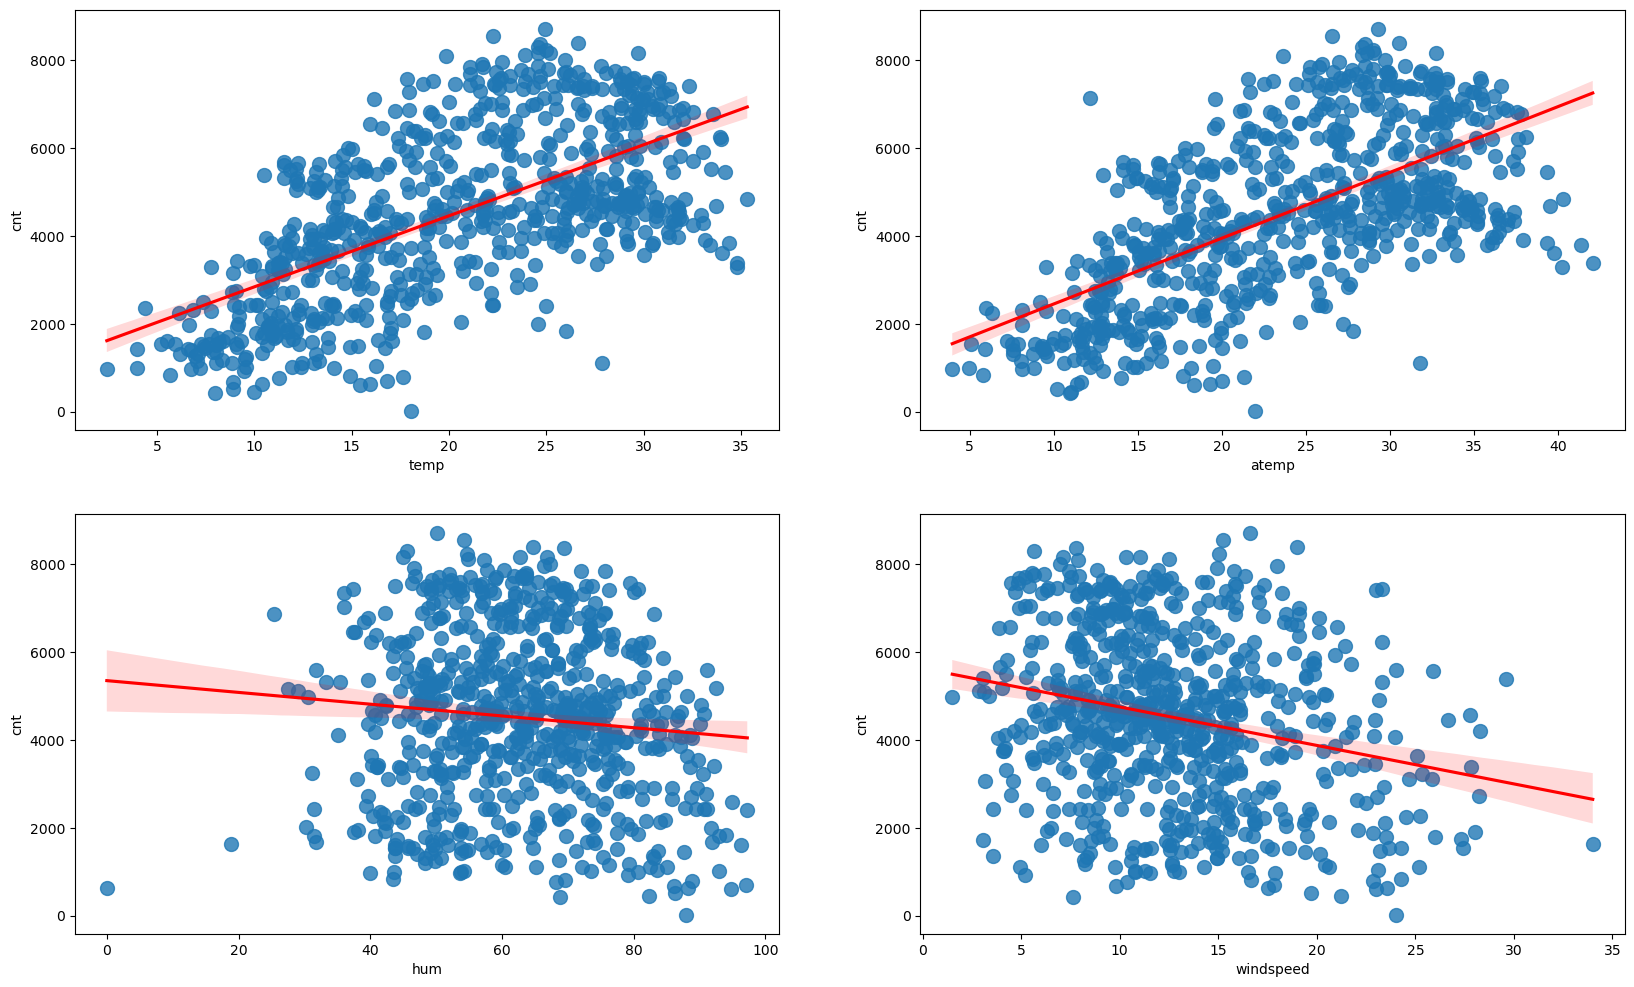

In [626]:
#Plots with Continuous vs Target Variable

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.regplot(x=day["temp"],y=day["cnt"],data=day, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.subplot(2,2,2)
sns.regplot(x=day["atemp"],y=day["cnt"], scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.subplot(2,2,3)
sns.regplot(x=day["hum"],y=day["cnt"], scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.subplot(2,2,4)
sns.regplot(x=day["windspeed"],y=day["cnt"],data=day, scatter_kws={'s': 100}, line_kws={'color': 'red'})

## Observations from plotting numerical varaibles against cnt

- temp and atemp looks like it has some positive correlation and best fit line and the distribution has a pattern
- Others doesn't have much pattern





.

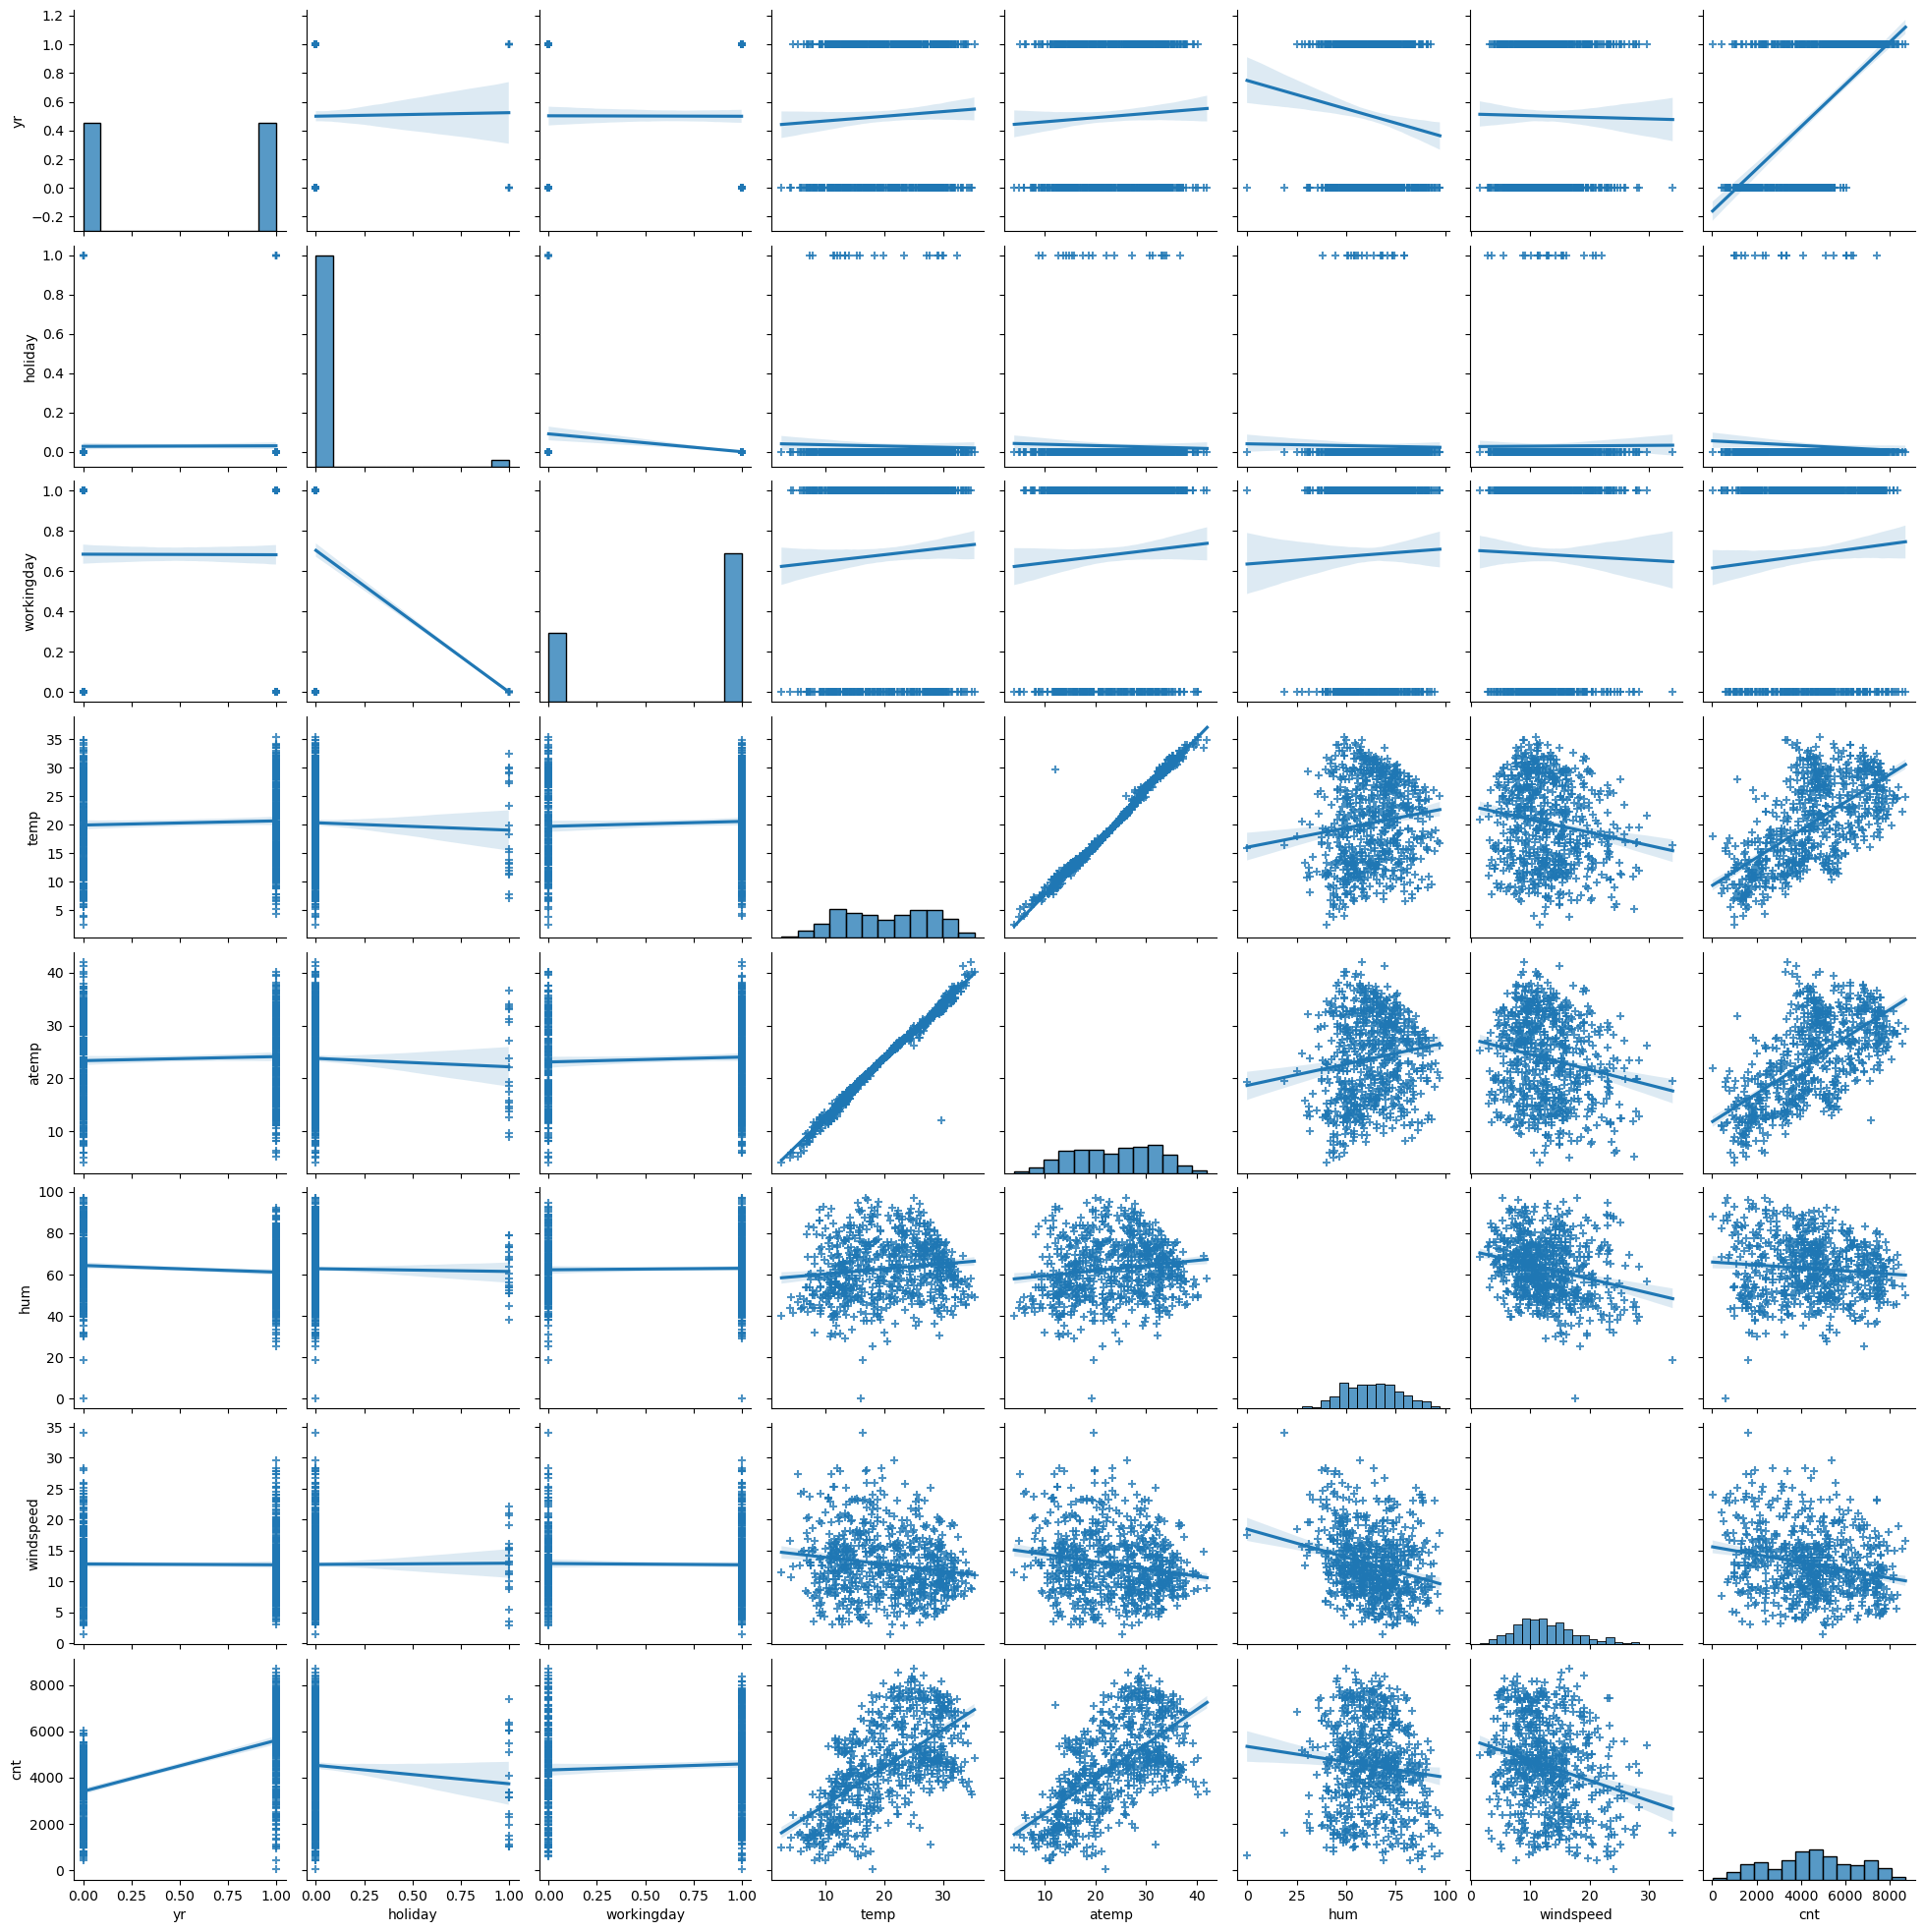

In [975]:
sns.pairplot(day, kind= 'reg',markers='+',palette='Purples')
plt.show()

## Observations from pair plots

The data seems to be cyclic in nature, there is a clear pattern for 2018 and the same pattern occurs in 2019 too (from Jan to Dec)

In [630]:
non_numeric_columns = day.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


### Correlation Matrix to check inter-variable relations

In [980]:
#Creating a dataframe only with numerical variables so that correlation matrix can be derived

day_num = pd.read_csv("day.csv")
day_num = day_num.drop("instant",axis=1)
day_num = day_num.drop("dteday",axis=1)
day_num= day_num.drop("casual",axis=1)
day_num= day_num.drop("registered",axis=1)
day_num= day_num.drop("season",axis=1)
day_num= day_num.drop("mnth",axis=1)
day_num= day_num.drop("weekday",axis=1)
day_num= day_num.drop("weathersit",axis=1)
day.head()
day_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 45.8 KB


In [638]:
day_num.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [650]:
correlation_matrix = day_num.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


## Observations

- The target variable seem to have relative high positive correlation with temperature of the day and actual temperature.
- A mild negative correlation is observed with windspeed.
- Year seems to have some correlation but since it is a categorical variable and we saw that there seems to have been a growth in 2018 and 2019, we can't consider as correlation doesn't mean causation.

# Machine Learning - Linear Regression

### Creating Dummy Variables

In [681]:
#Creating new dataframe for ML algorithm

day_ml = day.copy()

In [683]:
# Checking shape before splitting
day.shape

(730, 12)

In [688]:
day_ml = pd.get_dummies(day_ml, drop_first=True)
day_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   yr                             730 non-null    int64  
 1   holiday                        730 non-null    int64  
 2   workingday                     730 non-null    int64  
 3   temp                           730 non-null    float64
 4   atemp                          730 non-null    float64
 5   hum                            730 non-null    float64
 6   windspeed                      730 non-null    float64
 7   cnt                            730 non-null    int64  
 8   season_Spring                  730 non-null    bool   
 9   season_Summer                  730 non-null    bool   
 10  season_Winter                  730 non-null    bool   
 11  mnth_Aug                       730 non-null    bool   
 12  mnth_Dec                       730 non-null    boo

In [690]:
day_ml.shape

(730, 30)

In [694]:
day_ml.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Rain or Snow',
       'weathersit_Misty and Cloudy'],
      dtype='object')

In [677]:
day_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   atemp               730 non-null    float64
 5   hum                 730 non-null    float64
 6   windspeed           730 non-null    float64
 7   cnt                 730 non-null    int64  
 8   Spring              730 non-null    bool   
 9   Summer              730 non-null    bool   
 10  Winter              730 non-null    bool   
 11  Aug                 730 non-null    bool   
 12  Dec                 730 non-null    bool   
 13  Feb                 730 non-null    bool   
 14  Jan                 730 non-null    bool   
 15  Jul                 730 non-null    bool   
 16  Jun     

## Splitting the data

In [984]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(day_ml, train_size = 0.70, test_size = 0.30, random_state = 333)

#70% Training Dataset, 30% testing Dataset

In [986]:
df_train.shape

(510, 30)

In [988]:
df_test.shape

(219, 30)

In [990]:
#Converting Boolean values into unit8 datatype for further calculations

boolean_columns = day_ml.select_dtypes(include='bool').columns

day_ml[boolean_columns] = day_ml[boolean_columns].astype('uint8')

In [995]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Rain or Snow',
       'weathersit_Misty and Cloudy'],
      dtype='object')

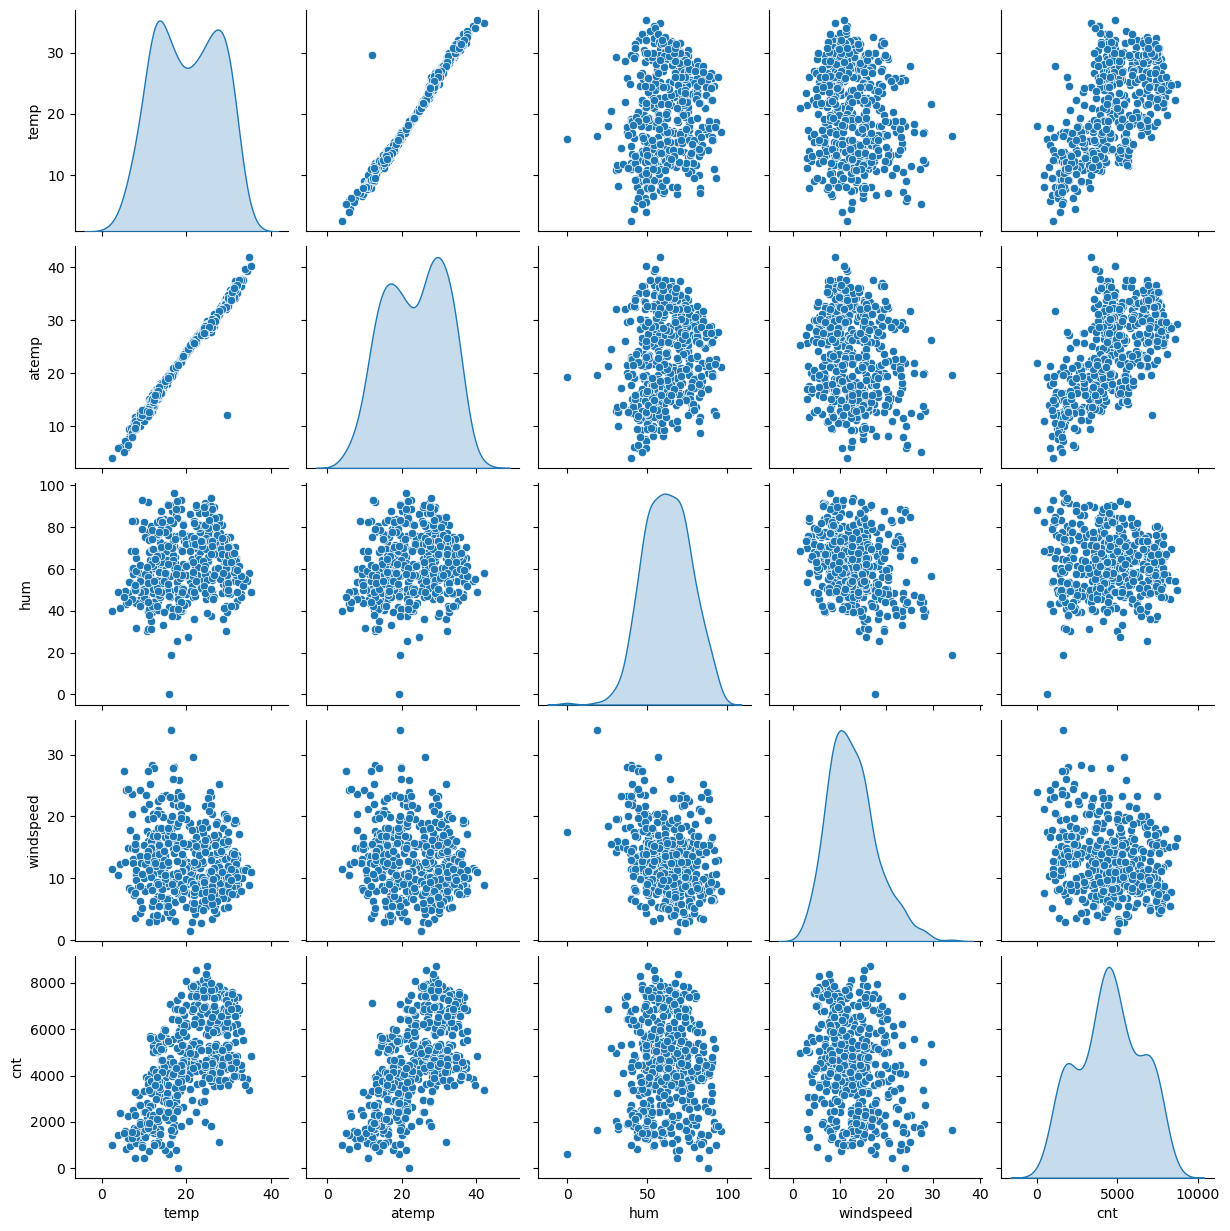

In [997]:
# Create a new dataframe from the training dataset to perform some analysis

dayml_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

In [999]:
correlation_matrix = dayml_num.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.989610,0.173758,-0.161614,0.627185
atemp,0.989610,1.000000,0.186440,-0.190693,0.630458
hum,0.173758,0.186440,1.000000,-0.281480,-0.059645
windspeed,-0.161614,-0.190693,-0.281480,1.000000,-0.239927
cnt,0.627185,0.630458,-0.059645,-0.239927,1.000000


## Feature Rescaling

In [1002]:
from sklearn.preprocessing import MinMaxScaler

In [1003]:
scaler = MinMaxScaler()

In [1006]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,0,0,0,1,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,1,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1008]:
boolean_columns = df_train.select_dtypes(include='bool').columns

df_train[boolean_columns] = df_train[boolean_columns].astype('uint8')

In [1012]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,0,0,0,1,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,1,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1014]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Rain or Snow',
       'weathersit_Misty and Cloudy'],
      dtype='object')

In [1016]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1018]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,1,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,1,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1020]:
# check the shape of testing datatset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.084314,0.082353,0.139216,0.150980,0.143137,0.129412,0.141176,0.150980,0.025490,0.341176
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.278131,0.275172,0.346511,0.358381,0.350557,0.335985,0.348545,0.358381,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building a Linear Model

## Preparation

In [1023]:
#Dividing x and y sets for model building
# y is the dependent variable also our target variable
# x is all the independent variables

y_train = df_train.pop('cnt')
X_train = df_train
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

In [1025]:
# Importing RFE and LinearRegression Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1027]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)
print("Feature Rankings:", rfe.ranking_)

Selected Features: Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Mar', 'mnth_May', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Rain or Snow'],
      dtype='object')
Feature Rankings: [ 1  1  1  1  1  1  1  1 11  1  9  4  8  7  5 13  1  1  2 12  1  6  1  1
 14 10 15  1  3]


In [1029]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 11),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 7),
 ('mnth_Jul', False, 5),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 15),
 ('weathersit_Light Rain or Snow', True, 1),
 ('weathersit_Misty and Cloudy', False, 3)]

In [1031]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Mar', 'mnth_May', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Rain or Snow'],
      dtype='object')

In [1033]:
X_train.columns[~rfe.support_]

Index(['season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Misty and Cloudy'],
      dtype='object')

In [1035]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Linear Regression using STATS Model

### 1st Iteration, Using Just the RFE resulted Features

In [1039]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1041]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,53.30
4,atemp,51.88
2,workingday,41.51
12,weekday_Saturday,9.82
13,weekday_Sunday,9.48
7,season_Spring,2.77
1,holiday,2.45
8,season_Winter,1.94
5,hum,1.29
6,windspeed,1.20


In [1043]:
import statsmodels.api as sm

In [1045]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [1047]:
# Check the parameters obtained

lr1.params

const                            0.295805
yr                               0.226070
holiday                          0.043878
workingday                       0.091340
temp                             0.344164
atemp                            0.143836
hum                             -0.272522
windspeed                       -0.190246
season_Spring                   -0.108365
season_Winter                    0.073461
mnth_Mar                         0.051528
mnth_May                         0.050307
mnth_Sep                         0.084555
weekday_Saturday                 0.106434
weekday_Sunday                   0.054153
weathersit_Light Rain or Snow   -0.223750
dtype: float64

In [825]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.0
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          8.37e-180
Time:                        10:40:05   Log-Likelihood:                 490.28
No. Observations:                 510   AIC:                            -950.6
Df Residuals:                     495   BIC:                            -887.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Observations from Model 1:

- F-Static value is 172, where as the P value associated with the model is very low, almost 0. Thus making overall model statistically significant.
- R-Squared value is 0.829, which means 82.9% variance is explained by the independent variables from the model
- The adjusted R-Squared value is 0.825
- The VIF of temp, atemp and working day seems to be so high, we can drop one to see how the model performs in the next.


## Iteration 2, Removing atemp

- Removing the variable 'atemp' based on its Very High 'VIF' value.
- Even though the VIF of atemp is second highest, decided to drop 'atemp' and not 'temp' based on general knowledge.

In [1051]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [1053]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,41.24
11,weekday_Saturday,9.75
12,weekday_Sunday,9.41
6,season_Spring,2.77
3,temp,2.58
1,holiday,2.44
7,season_Winter,1.92
4,hum,1.29
9,mnth_May,1.19
5,windspeed,1.17


In [1055]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [1057]:
lr2.params

const                            0.297903
yr                               0.226053
holiday                          0.043718
workingday                       0.091962
temp                             0.477468
hum                             -0.271389
windspeed                       -0.195434
season_Spring                   -0.108391
season_Winter                    0.074733
mnth_Mar                         0.052270
mnth_May                         0.051298
mnth_Sep                         0.083868
weekday_Saturday                 0.107264
weekday_Sunday                   0.054959
weathersit_Light Rain or Snow   -0.224492
dtype: float64

In [1059]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.2
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          3.28e-182
Time:                        13:36:24   Log-Likelihood:                 493.29
No. Observations:                 510   AIC:                            -958.6
Df Residuals:                     496   BIC:                            -899.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Iteration 3, Removing working day

In [1062]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [1064]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.22
2,temp,11.05
4,windspeed,4.85
5,season_Spring,2.65
6,season_Winter,2.08
0,yr,2.04
8,mnth_May,1.30
10,weekday_Saturday,1.22
11,weekday_Sunday,1.21
7,mnth_Mar,1.20


In [1066]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [1068]:
# Check the parameters obtained

lr3.params

const                            0.389866
yr                               0.226053
holiday                         -0.048244
temp                             0.477468
hum                             -0.271389
windspeed                       -0.195434
season_Spring                   -0.108391
season_Winter                    0.074733
mnth_Mar                         0.052270
mnth_May                         0.051298
mnth_Sep                         0.083868
weekday_Saturday                 0.015302
weekday_Sunday                  -0.037004
weathersit_Light Rain or Snow   -0.224492
dtype: float64

In [1070]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.2
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          3.28e-182
Time:                        13:38:39   Log-Likelihood:                 493.29
No. Observations:                 510   AIC:                            -958.6
Df Residuals:                     496   BIC:                            -899.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Itereation 4, removing hum

In [1073]:
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [1090]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.78
2,temp,4.24
0,yr,2.04
4,season_Spring,1.83
5,season_Winter,1.38
7,mnth_May,1.21
9,weekday_Saturday,1.21
6,mnth_Mar,1.20
10,weekday_Sunday,1.20
8,mnth_Sep,1.17


In [1092]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [1094]:
# Check the parameters obtained

lr4.params

const                            0.213658
yr                               0.233985
holiday                         -0.042341
temp                             0.450151
windspeed                       -0.135338
season_Spring                   -0.112337
season_Winter                    0.058562
mnth_Mar                         0.057586
mnth_May                         0.027755
mnth_Sep                         0.066774
weekday_Saturday                 0.015527
weekday_Sunday                  -0.037012
weathersit_Light Rain or Snow   -0.288622
dtype: float64

In [1096]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          2.82e-168
Time:                        13:43:03   Log-Likelihood:                 457.45
No. Observations:                 510   AIC:                            -888.9
Df Residuals:                     497   BIC:                            -833.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Text(0.5, 0, 'Errors')

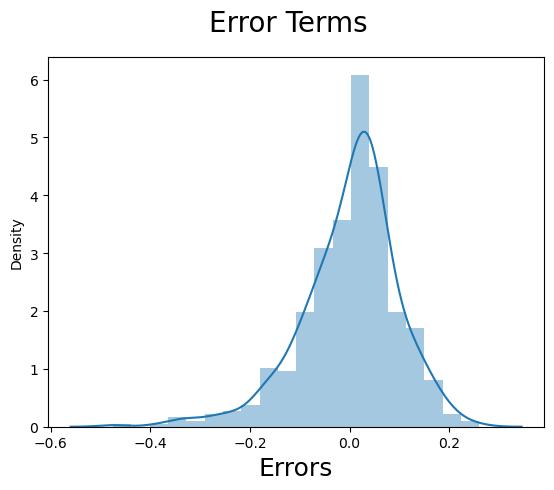

In [1131]:
y_train_pred = lr4.predict(X_train_lm4)

res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions with the Model

In [1138]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1141]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,1,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,1,0,0,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,1,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,0,0,0,1,0,0,1


In [1144]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,...,0.086758,0.082192,0.155251,0.127854,0.146119,0.173516,0.146119,0.118721,0.036530,0.324201
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,...,0.282125,0.275286,0.362974,0.334692,0.354034,0.379560,0.354034,0.324202,0.188034,0.469148
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1147]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   yr                             219 non-null    int64  
 1   holiday                        219 non-null    int64  
 2   workingday                     219 non-null    int64  
 3   temp                           219 non-null    float64
 4   atemp                          219 non-null    float64
 5   hum                            219 non-null    float64
 6   windspeed                      219 non-null    float64
 7   season_Spring                  219 non-null    uint8  
 8   season_Summer                  219 non-null    uint8  
 9   season_Winter                  219 non-null    uint8  
 10  mnth_Aug                       219 non-null    uint8  
 11  mnth_Dec                       219 non-null    uint8  
 12  mnth_Feb                       219 non-null    uint8  

In [1155]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          219 non-null    float64
 1   yr                             219 non-null    int64  
 2   holiday                        219 non-null    int64  
 3   temp                           219 non-null    float64
 4   windspeed                      219 non-null    float64
 5   season_Spring                  219 non-null    uint8  
 6   season_Winter                  219 non-null    uint8  
 7   mnth_Mar                       219 non-null    uint8  
 8   mnth_May                       219 non-null    uint8  
 9   mnth_Sep                       219 non-null    uint8  
 10  weekday_Saturday               219 non-null    uint8  
 11  weekday_Sunday                 219 non-null    uint8  
 12  weathersit_Light Rain or Snow  219 non-null    uint8  

In [1157]:
# Making predictions using the final model (lr6)

y_pred = lr4.predict(X_test_lm5)

# Evaluation

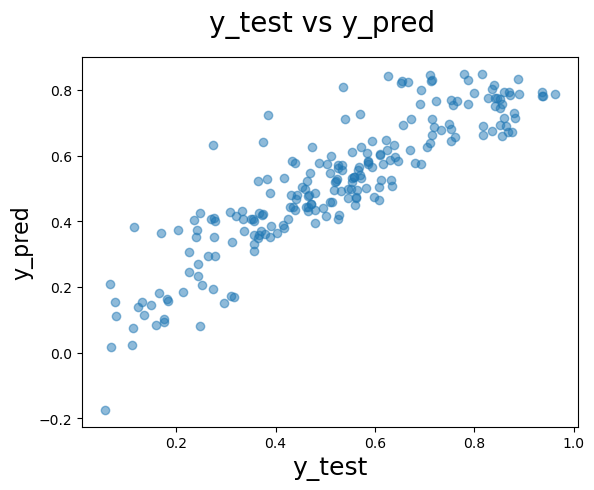

In [1162]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [1165]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.7931638132939893

# Overall Observation and Conclusions

The top contributors for our target variable are as follows:

1. temp (Temperature): Coefficient = 0.4502. For every one-unit increase in temperature, cnt is expected to increase by approximately 0.4502 units.



2. weathersit_Light Rain or Snow: Coefficient = -0.2886. In light rain or snow weather conditions, cnt is expected to decrease by approximately 0.2886 units.

3. yr (Year): Coefficient = 0.2340 : For each additional year, cnt is expected to increase by approximately 0.2340 units.
holiday: 0.0423
